In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path
import os


In [2]:
# Check and change the current working directory - A.F.
print(os.getcwd())
os.chdir(Path().resolve())

c:\Users\Amanda\Documents\Capstone\DSE6311OM_Group3\Notebook


In [3]:
# read in data set with first column (district name) set to index
df = pd.read_excel("../Data/cleaned_data_encoded.xlsx", index_col =0)
df.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,graduation_rate_pct,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,...,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,,,,,,,,,,
Abington,11.0,17.8,39,3.560342e+07,16609.95,88.9,1.3,0.7,0.0,9.2,...,1,0,0,0,0,0,1,0,17.387952,40.85
Acton-Boxborough,6.2,15.5,85,1.005648e+08,19407.68,96.1,3.2,0.2,0.0,0.4,...,1,0,0,0,0,1,0,0,18.426312,20.10
Agawam,6.2,18.3,46,7.195848e+07,20414.91,88.0,1.1,1.9,0.4,8.6,...,1,0,0,0,0,0,1,0,18.091600,46.05
Amesbury,2.7,23.7,47,3.996617e+07,22338.70,88.3,2.5,0.8,0.8,7.5,...,1,0,0,0,0,0,1,0,17.503544,40.10
Amherst-Pelham,7.3,24.2,33,3.248902e+07,26177.60,90.9,4.1,0.9,0.9,3.2,...,0,1,0,1,0,0,0,0,17.296413,36.90


### **DO NOT FORGET (There is in_district_expenditures feature in the df dataset)**

# E.T. A.F. F.R.
### Train and Test split

In [ ]:
# E.T.
# test train splitfrom sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['graduation_rate_pct'])
y = df['graduation_rate_pct']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (178, 22)
X_test shape: (45, 22)
y_train shape: (178,)
y_test shape: (45,)


In [5]:
X_train.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,...,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,,,,,,,,,,
Mohawk Trail,0.8,23.3,49,2.108065e+07,26406.92,3.3,3.3,0.0,10.0,10.6,...,0,1,0,1,0,0,0,0,16.863866,48.95
Gateway,1.7,25.0,31,1.833836e+07,23328.28,0.0,0.0,0.0,4.7,9.3,...,1,0,0,0,0,0,1,0,16.724506,53.20
Groton-Dunstable,1.9,16.6,73,4.669791e+07,19902.79,1.2,0.0,0.0,0.6,12.7,...,1,0,0,0,0,0,0,1,17.659210,17.90
Leominster,13.8,23.8,54,1.021028e+08,17132.78,3.6,2.8,0.0,3.0,13.8,...,1,0,0,0,0,0,0,1,18.441491,60.75
Melrose,5.0,16.6,63,5.899651e+07,15247.73,1.8,0.0,0.0,1.3,14.6,...,1,0,0,0,0,0,0,1,17.892989,23.05


In [6]:
y_train.head()

district_name
Mohawk Trail        83.3
Gateway             95.3
Groton-Dunstable    98.2
Leominster          90.6
Melrose             96.9
Name: graduation_rate_pct, dtype: float64

In [7]:
X_test.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,...,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,,,,,,,,,,
Athol-Royalston,2.4,24.8,23,2.813300e+07,17920.25,9.5,1.2,0.0,4.8,13.3,...,1,0,0,0,1,0,0,0,17.152454,67.85
Holyoke,18.3,30.2,46,1.234559e+08,24923.46,9.9,2.3,0.0,13.2,11.4,...,0,1,1,0,0,0,0,0,18.631394,87.55
Medford,12.7,20.8,42,9.282876e+07,22254.69,2.1,0.6,0.3,6.2,10.6,...,1,0,0,0,0,0,1,0,18.346267,46.55
North Middlesex,2.4,24.1,22,5.410222e+07,18174.01,3.3,0.0,0.0,1.7,12.1,...,1,0,0,0,1,0,0,0,17.806386,35.70
Winthrop,9.5,16.1,56,3.308017e+07,16958.10,1.5,0.0,0.0,5.9,12.9,...,1,0,0,0,0,0,0,1,17.314445,44.40


In [8]:
y_test.head()

district_name
Athol-Royalston    84.5
Holyoke            74.6
Medford            90.8
North Middlesex    95.0
Winthrop           92.6
Name: graduation_rate_pct, dtype: float64

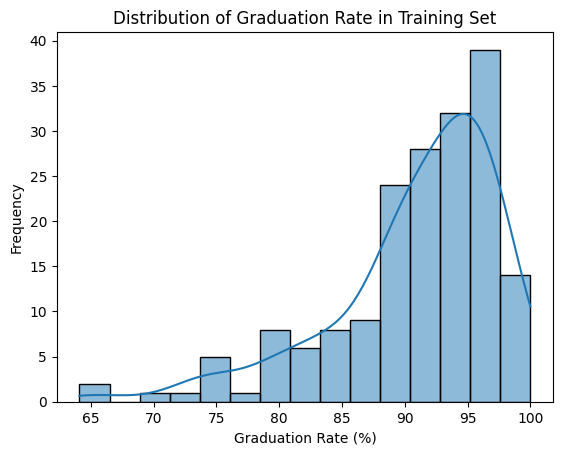

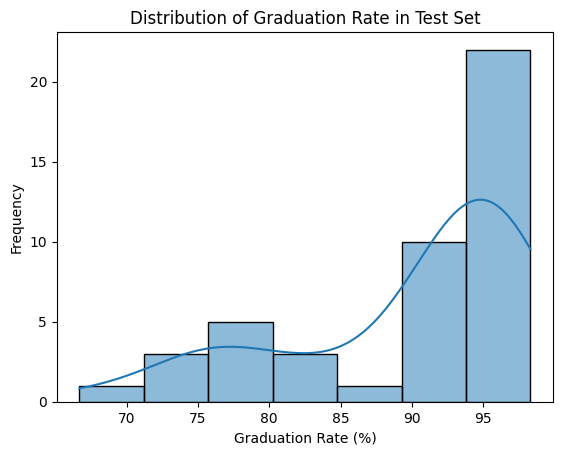

In [ ]:
#check the datas if normally distributed

# Plot the distribution of the target variable
sns.histplot(y_train, kde=True)
plt.title("Distribution of Graduation Rate in Training Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()
# Plot the distribution of the target variable in the test set
sns.histplot(y_test, kde=True)
plt.title("Distribution of Graduation Rate in Test Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

# E.T. A.F. F.R.
#### Importing the StandardScaler for feature scaling

In [ ]:

# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
# Print the first few rows of the scaled training data


In [11]:
X_train_scaled.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,...,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,,,,,,,,,,
Mohawk Trail,-0.735186,1.308002,-0.287253,-0.423558,1.656426,-0.155009,2.100148,-0.424694,1.341175,-0.922858,...,-4.609772,4.609772,-0.1066,5.354126,0.0,-0.413585,-0.883176,-0.767649,-1.158075,0.495694
Gateway,-0.626666,1.867597,-1.350022,-0.443957,0.819300,-1.375551,-0.591010,-0.424694,0.049693,-1.822771,...,0.216930,-0.216930,-0.1066,-0.186772,0.0,-0.413585,1.132277,-0.767649,-1.337178,0.729174
Groton-Dunstable,-0.602550,-0.897460,1.129772,-0.232996,-0.112141,-0.931718,-0.591010,-0.424694,-0.949378,0.530848,...,0.216930,-0.216930,-0.1066,-0.186772,0.0,-0.413585,-0.883176,1.302678,-0.135915,-1.210085
Leominster,0.832325,1.472589,0.007961,0.179151,-0.865346,-0.044051,1.692397,-0.424694,-0.364556,1.292313,...,0.216930,-0.216930,-0.1066,-0.186772,0.0,-0.413585,-0.883176,1.302678,0.869456,1.143945
Melrose,-0.228759,-0.897460,0.539345,-0.141509,-1.377919,-0.709801,-0.591010,-0.424694,-0.778804,1.846105,...,0.216930,-0.216930,-0.1066,-0.186772,0.0,-0.413585,-0.883176,1.302678,0.164533,-0.927162


In [12]:
X_test_scaled.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,...,overall_classification_Not requiring assistance or intervention,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,,,,,,,,,,
Athol-Royalston,-0.542261,1.801762,-1.822363,-0.371096,-0.651222,2.138130,0.387593,-0.424694,0.074061,0.946192,...,0.216930,-0.216930,-0.106600,-0.186772,1.0,-0.413585,-0.883176,-0.767649,-0.787188,1.533995
Holyoke,1.374926,3.579299,-0.464381,0.337993,1.253052,2.286075,1.284646,-0.424694,2.120938,-0.369065,...,-4.609772,4.609772,9.380832,-0.186772,0.0,-0.413585,-0.883176,-0.767649,1.113516,2.616244
Medford,0.699690,0.485069,-0.700552,0.110163,0.527375,-0.598843,-0.101709,0.424694,0.415207,-0.922858,...,0.216930,-0.216930,-0.106600,-0.186772,0.0,-0.413585,1.132277,-0.767649,0.747076,0.363847
North Middlesex,-0.542261,1.571341,-1.881406,-0.177916,-0.582221,-0.155009,-0.591010,-0.424694,-0.681334,0.115503,...,0.216930,-0.216930,-0.106600,-0.186772,1.0,-0.413585,-0.883176,-0.767649,0.053232,-0.232215
Winthrop,0.313841,-1.062047,0.126046,-0.334295,-0.912844,-0.820759,-0.591010,-0.424694,0.342104,0.669296,...,0.216930,-0.216930,-0.106600,-0.186772,0.0,-0.413585,-0.883176,1.302678,-0.579000,0.245733


## A.F.
Create null model that predict the mean of the training target.

In [ ]:
# Create and fit the null model
null_model = DummyRegressor(strategy='mean')
null_model.fit(X_train_scaled, y_train)

# Evaluate the null model using cross-validation since other models will be evaluated using cross-validation
cv_scores = cross_val_score(null_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive  
mse_scores_null = -cv_scores

# Calculate the mean MSE score 
mean_mse_null = mse_scores_null.mean()

# Print the mean MSE score for the null model
print(f"Mean MSE score for the null model: {mean_mse_null:.2f}")

# Evaluate the null model on the test set
test_mse_null = mean_squared_error(y_test, null_model.predict(X_test_scaled))
print(f"Test MSE score for the null model: {test_mse_null:.2f}")

# Calculate R2 score for the null model
r2_null = r2_score(y_test, null_model.predict(X_test_scaled))
print(f"R2 score for the null model: {r2_null:.2f}")

# Calculate rmse for the null model
rmse_null = np.sqrt(test_mse_null)
print(f"RMSE for the null model: {rmse_null:.2f}")



Mean MSE score for the null model: 45.03
Test MSE score for the null model: 70.60
R2 score for the null model: -0.01
RMSE for the null model: 8.40

Null Model Performance Summary:
Mean MSE (CV): 45.03
Test MSE: 70.60
R2 Score: -0.01
RMSE: 8.40


# E.T. A.F. F.R.
#### Checking the Cross validation scores and fitting the models to our train dataset

In [20]:
# Create RandomForestRegressor model by using Crossvalidation


# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
rf_cv_scores = -rf_cv_scores

# Print the cross-validation scores
print("Cross-validation MSE scores:", rf_cv_scores)
print("Mean MSE:", np.mean(rf_cv_scores))
print("Standard Deviation of MSE:", np.std(rf_cv_scores))




Cross-validation MSE scores: [3.13210194 5.24090094 2.52714494 3.55199006 2.41663566]
Mean MSE: 3.3737547095238
Standard Deviation of MSE: 1.0207079832496833


#### Lets see after fitting the RF model to train dataset, see the training datasets MSE scores and R2

In [21]:
# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred_rf = rf_model.predict(X_train_scaled)

# Training set metrics
print("Train MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("Train R2:", r2_score(y_train, y_train_pred_rf))


Train MSE: 0.4564095674157377
Train R2: 0.9898513811008011


**Based on the cross validation MSE scores, the 5 subgroups of the X_train_scaled dataset's MSE scores are close to eachother. The Mean is 3.37 (the average error that our model does)**

In [23]:
# fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate the mean squared error and R-squared score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Test MSE:",mse_rf)
print("Test R2:",r2_rf)



Test MSE: 3.9313301333333053
Test R2: 0.9435578374267016


In [18]:
# Plotting the feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)



# E.T. A.F. F.R.
#### Comments: 

* CV Mean MSE score was 3.37 and test MSE score is 3.93. They are very close
* We believe that the model is not **overfitting** since the Test MSE is close to CV Mean MSE.
* The model is stable because the R2 is still good on unseen data (test)
* R2 score is 0.94, that tells us that our model captures the 94 % of the graduation rates correct.

In [19]:
feature_importances

,Feature,Importance
8,dropout_rate_pct,0.773232
5,still_in_school_pct,0.100687
21,needs_income_avg_pct,0.063784
6,non_grad_completers_pct,0.019265
10,experienced_teachers_pct,0.008940
0,english_learners_pct,0.004664
11,DOR_income_per_capita,0.004569
2,progress_toward_improvement_targets_pct,0.003425
1,students_with_disabilities_pct,0.003206
13,overall_classification_Requiring assistance or...,0.003173


## A.F.
Residual Analysis of Initial Random Forest Regression Model

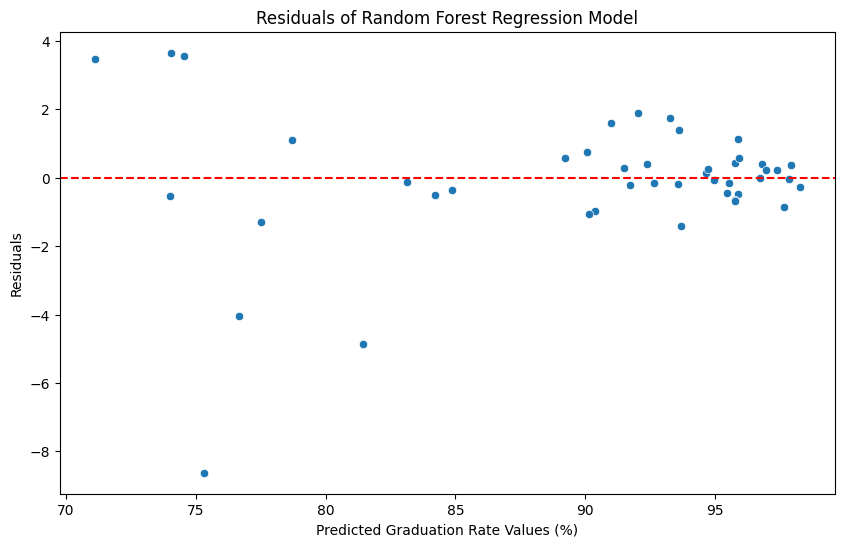

In [ ]:
# Check Random Forest Regression Model Residuals
residuals_rf = y_test - y_pred_rf

# Plotting the residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of Random Forest Regression Model")
plt.xlabel("Predicted Graduation Rate Values (%)")
plt.ylabel("Residuals")
plt.show()

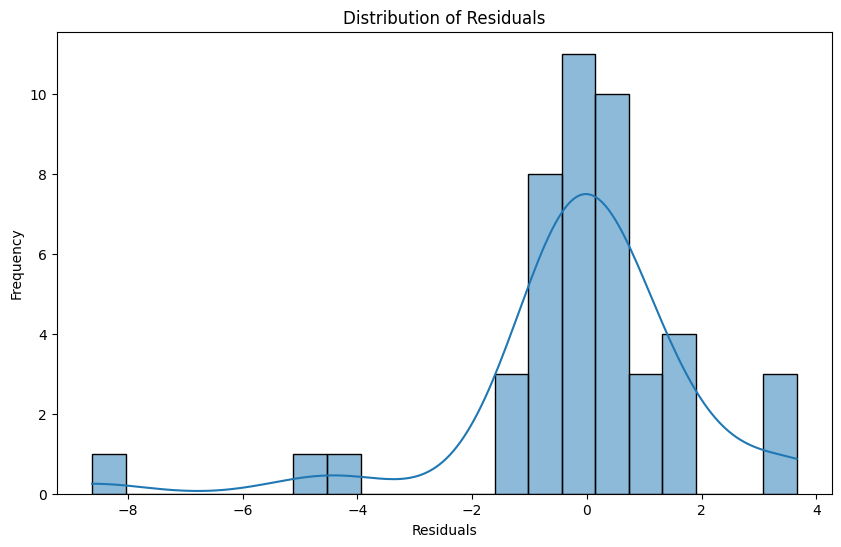

In [25]:
# Plotting the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

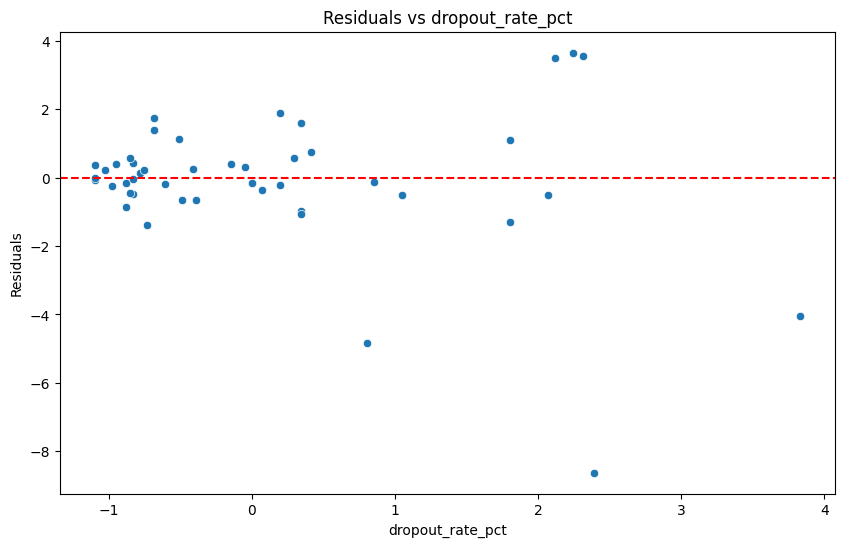

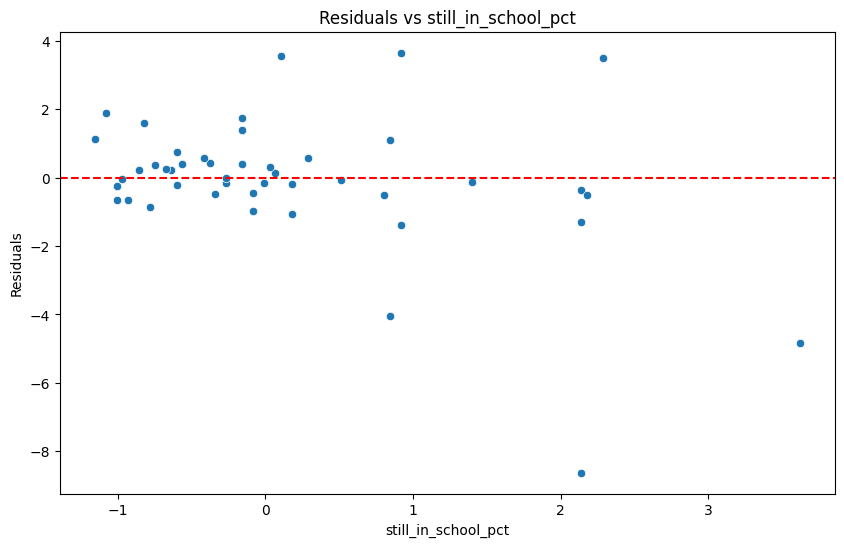

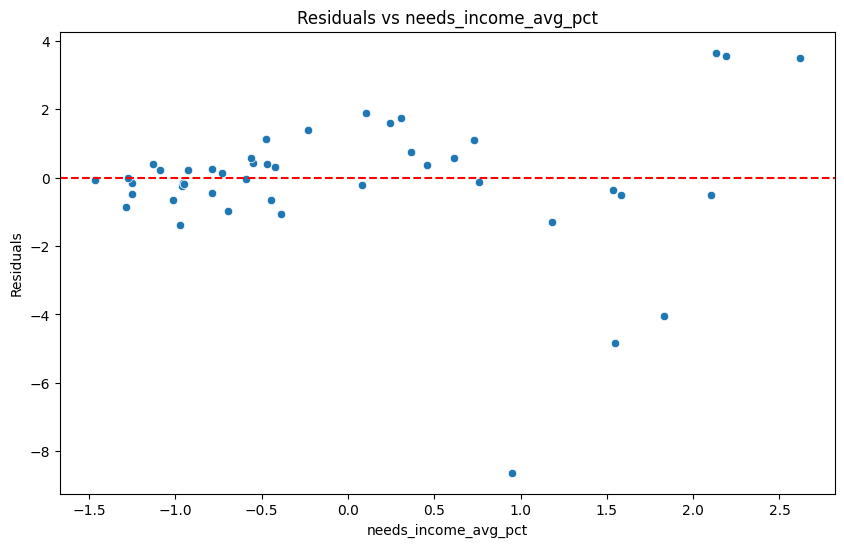

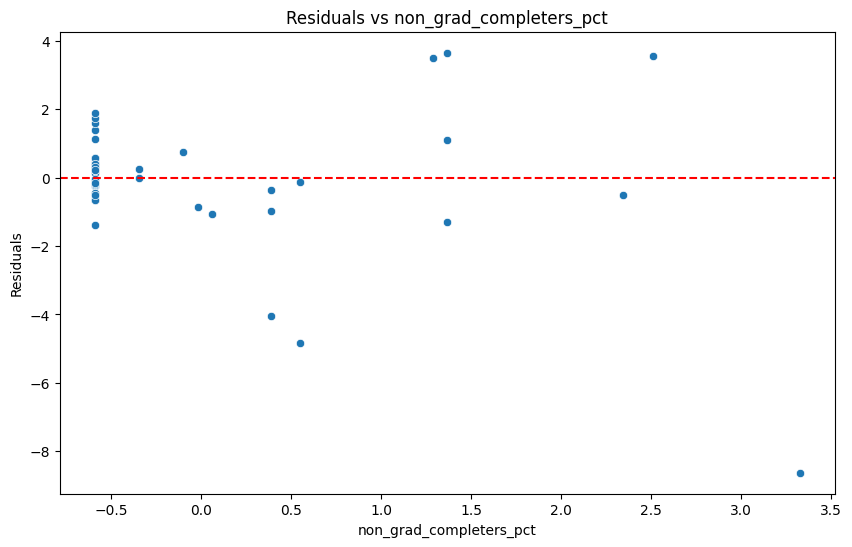

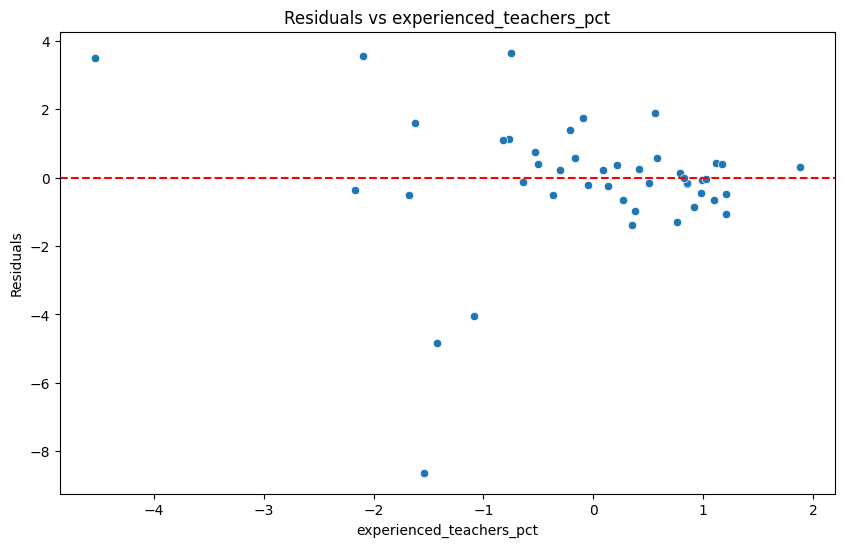

In [26]:
# Residuals versus each important predictor
for feature in feature_names[indices[:5]]:  # Top 5 important features
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_test_scaled[feature], y=residuals_rf)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residuals vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Residuals")
    plt.show()